In [1]:
# Loading the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
diabetes = pd.read_csv('diabetes.csv',sep=',',header='infer')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Understanding

In [3]:
# Basic Information about the dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Descriptive Statistics about the data
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Display the missing values in the data
count=0
for colname in diabetes.columns:
    count += diabetes[colname][diabetes[colname]==0].count()
    print(colname + " : " + str(count))
    count=0

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


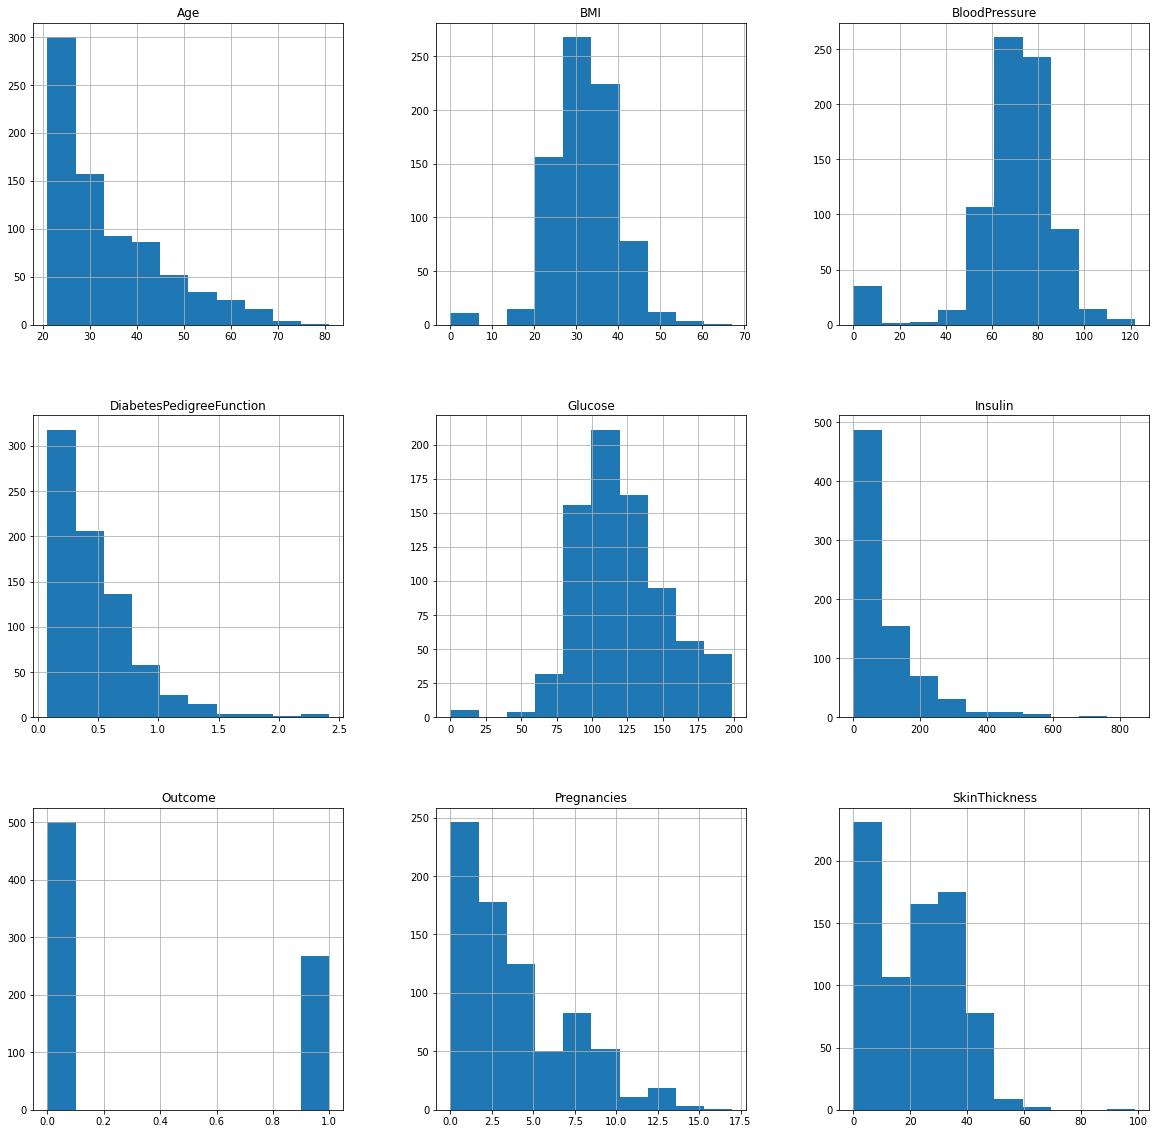

In [6]:
# Plot the distribution of all the variables
hist_plots = diabetes.hist(figsize = (20,20))

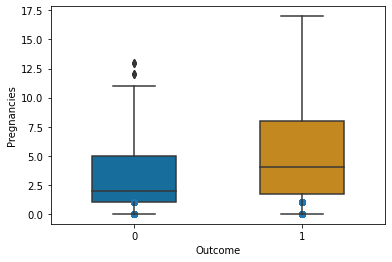

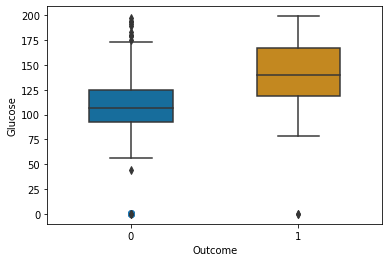

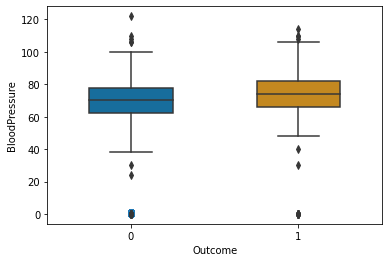

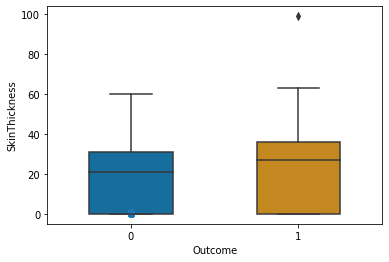

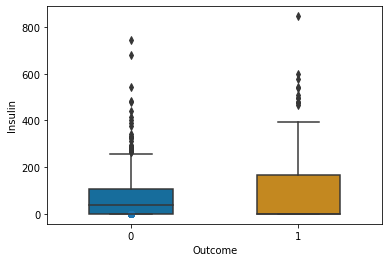

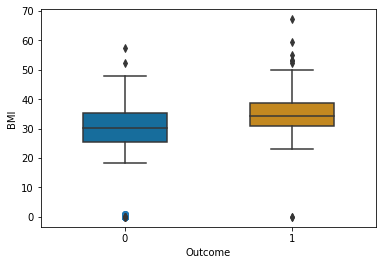

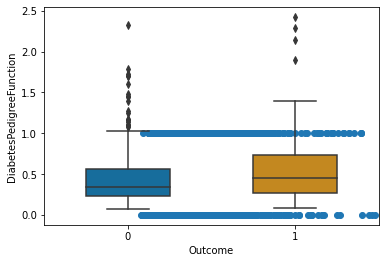

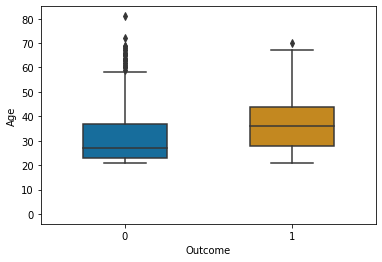

In [7]:
# Boxplot for all the variables
for i in range(0,8):
    y = diabetes['Outcome']
    x = diabetes.iloc[:,i]    
    plt.figure()
    plt.scatter(x,y)
    sns.boxplot(y=x, x=y, 
                 data=diabetes, 
                 width=0.5,
                 palette="colorblind")

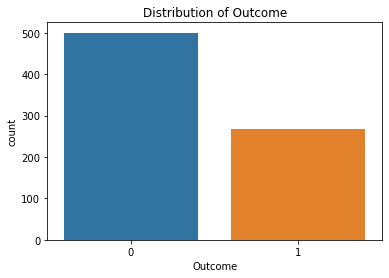

In [8]:
# Distribution of the Output Variable
sns.countplot(diabetes['Outcome']).set_title('Distribution of Outcome')
plt.show()

#### Summary

**Pregnancies:** For this column the min value is 0 which is an acceptable value, indicating "No Pregnancy", but the max value is 17 which does not look realistic. The boxplot as well suggests a few outliers for the Pregnancy values.

**Glucose:** 5 values for Glucose is 0. However, there are no outlier and also distribution is slightly normal. We can replace the 0 values with mean.

**BloodPressure:** Blood Pressure is 0 for 35 entires hence we would replace these values by the mean value. Also, few outliers exist. The lowest value is 25 which is not a realistic number for a low blood pressure.

**SkinThickness:** A large number of value, 227 for SkinThickness is 0. Hence, we would replace them with the mean value.

**Insulin:** For Insulin there are both a large number of 0s and Outliers. We would have to relace both the 0 values and also take into consideration the outliers. 

**BMI:** For the missing values (BMI=0), we would relace them with the mean value. However, we would leave the outliers as it might have an impact on the Outcome.  

**DiabetesPedigreeFunction:** A large number of outliers exist for this feature. 
	

### Data Preparation

In [9]:
# Replacing the values having 0 with Mean/Median based on distribution
diabetes.Glucose = diabetes.Glucose.replace(0,diabetes.Glucose.mean())
diabetes.BloodPressure = diabetes.BloodPressure.replace(0,diabetes.BloodPressure.median())
diabetes.SkinThickness = diabetes.SkinThickness.replace(0,diabetes.SkinThickness.mean())
diabetes.Insulin = diabetes.Insulin.replace(0,diabetes.Insulin.median())
diabetes.BMI = diabetes.BMI.replace(0,diabetes.BMI.mean())

In [10]:
# Rechecking for missing values in the data
count=0
for colname in diabetes.columns:
    count += diabetes[colname][diabetes[colname]==0].count()
    print(colname + " : " + str(count))
    count=0

Pregnancies : 111
Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208615,0.013376,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.218623,0.160766,0.357081,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208615,0.218623,1.000000,0.127874,-0.028721,0.281129,-0.002378,0.324915,0.165723
SkinThickness,0.013376,0.160766,0.127874,1.000000,0.274253,0.535703,0.154961,0.026423,0.175026
Insulin,-0.055697,0.357081,-0.028721,0.274253,1.000000,0.189031,0.178029,-0.015413,0.148457
BMI,0.021546,0.231478,0.281129,0.535703,0.189031,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,-0.002378,0.154961,0.178029,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.324915,0.026423,-0.015413,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.165723,0.175026,0.148457,0.312254,0.173844,0.238356,1.000000


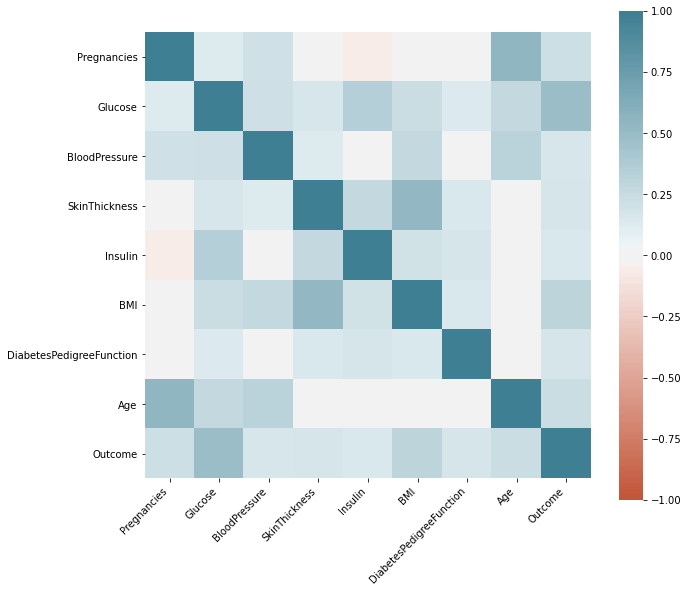

In [11]:
# Compute the correlation among the variables
corr = diabetes.corr()
display(corr)

# Plot the correlation
plt.figure(figsize=(10,9))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [12]:
# Checking for VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def get_VIF(dataFrame , target):
    X = add_constant(dataFrame.loc[:, dataFrame.columns != target])
    seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,)
    return seriesObject

target = 'Outcome'
print(get_VIF(diabetes,target))

const                       53.362425
Pregnancies                  1.432172
Glucose                      1.318556
BloodPressure                1.251816
SkinThickness                1.473728
Insulin                      1.265401
BMI                          1.552725
DiabetesPedigreeFunction     1.062769
Age                          1.607655
dtype: float64


In [13]:
# Scaling the columns to deal with the outliers
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [14]:
# Assigning the y column
y = diabetes['Outcome']

### Modelling & Evaluation

### Logistic Regression

In [15]:
# Running the logistic model for selecting the final input variables
import statsmodels.api as sm
logit_model=sm.Logit(y,X.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.520083
         Iterations 6
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.196     
Dependent Variable:   Outcome            AIC:                814.8480  
Date:                 2021-04-23 23:53   BIC:                851.9984  
No. Observations:     768                Log-Likelihood:     -399.42   
Df Model:             7                  LL-Null:            -496.74   
Df Residuals:         760                LLR p-value:        1.5684e-38
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------------
Pregnancies               0.3974   0.1075  3.6962 0.0002  0.186

In [16]:
# Removing the variables with high p-values
X = X.drop(['SkinThickness'], axis=1)

# Running the model again for significant variables
logit_model=sm.Logit(y,X.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.520143
         Iterations 6
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.196     
Dependent Variable:   Outcome            AIC:                812.9404  
Date:                 2021-04-23 23:53   BIC:                845.4469  
No. Observations:     768                Log-Likelihood:     -399.47   
Df Model:             6                  LL-Null:            -496.74   
Df Residuals:         761                LLR p-value:        2.7497e-39
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------------
Pregnancies               0.3966   0.1075  3.6897 0.0002  0.185

In [17]:
# Training the model using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
# Predicting the 'response variable' y using the Logistic Regression
y_pred = logreg.predict(X_test)
print('Accuracy (Logistic Regression): {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy (Logistic Regression): 0.8182


In [19]:
# Displaing the Confusion Matrix - Logistic Regression
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[98  9]
 [19 28]]


In [20]:
# Displaying the Logistic Regression model statistics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



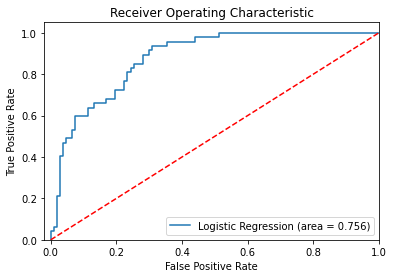

In [21]:
# Displaying the ROC-AUC - Logistic Regression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Logistic_ROC')
plt.show()

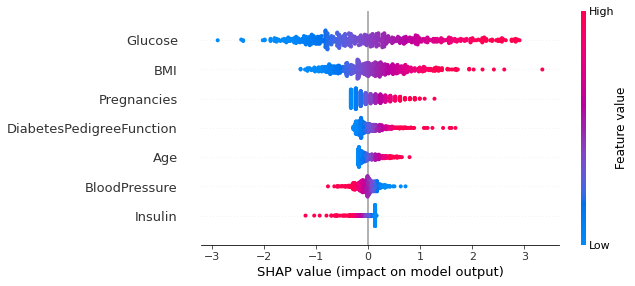

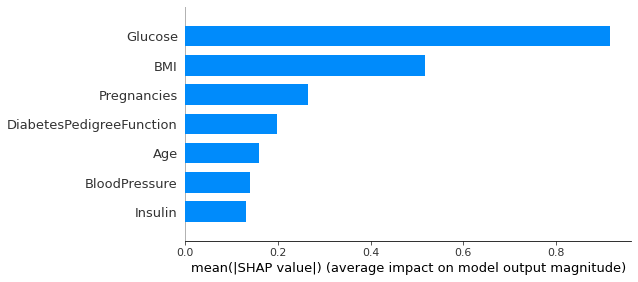

In [22]:
import shap
shap.initjs()
explainer = shap.LinearExplainer(logreg, X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)
shap.summary_plot(shap_values, X_train, plot_type="bar")

### Random Forest

In [23]:
# Training the model using Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rfc = RandomForestClassifier(n_estimators = 500, max_depth=20, random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=500, random_state=0)

In [24]:
# Predicting the 'response variable' y using the Random Forest
y_pred = rfc.predict(X_test)
print('Accuracy (Random Forest): {:.4f}'.format(rfc.score(X_test, y_test)))

Accuracy (Random Forest): 0.8247


In [25]:
# Displaing the Confusion Matrix - Random Forest
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[94 13]
 [14 33]]


In [26]:
# Displaying the Random Forest model statistics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       107
           1       0.72      0.70      0.71        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



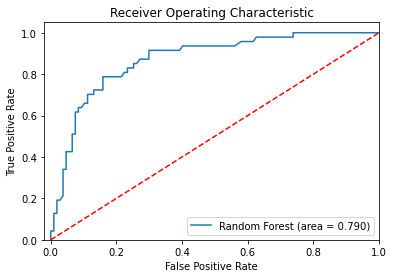

In [27]:
# Displaying the ROC-AUC - Random Forest
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.3f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('RandomForest_ROC')
plt.show()

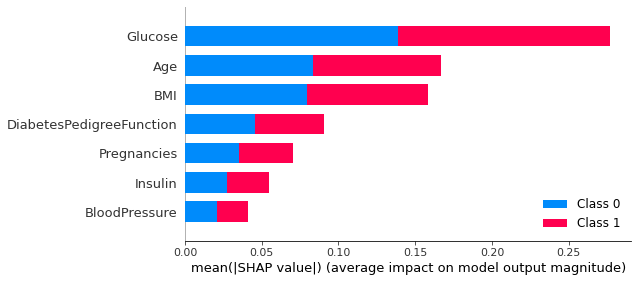

In [28]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

### Support Vector Machine (SVM) 

In [29]:
# Training the model using SVM 
from sklearn.svm import LinearSVC
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

svm = LinearSVC(max_iter=3000)
svm.fit(X_train, y_train)

LinearSVC(max_iter=3000)

In [30]:
# Predicting the 'response variable' y using the SVM
y_pred = svm.predict(X_test)
print('Accuracy (SVM): {:.4f}'.format(svm.score(X_test, y_test)))

Accuracy (SVM): 0.8182


In [31]:
# Displaing the Confusion Matrix - SVM
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[98  9]
 [19 28]]


In [32]:
# Displaying the SVM model statistics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



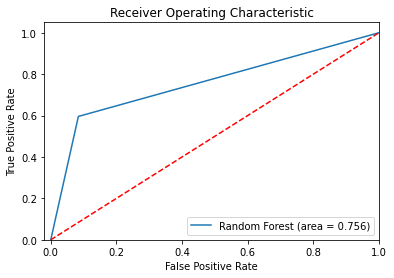

In [33]:
# Displaying the ROC-AUC - SVM
svm_roc_auc = roc_auc_score(y_test, svm.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.3f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('RandomForest_ROC')
plt.show()

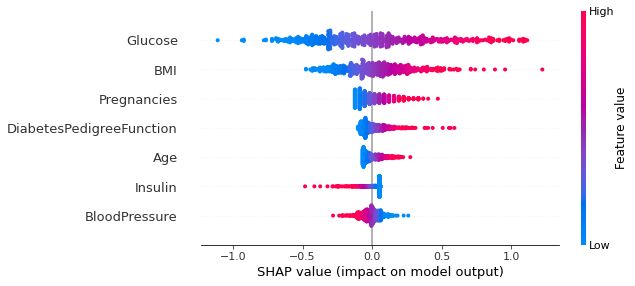

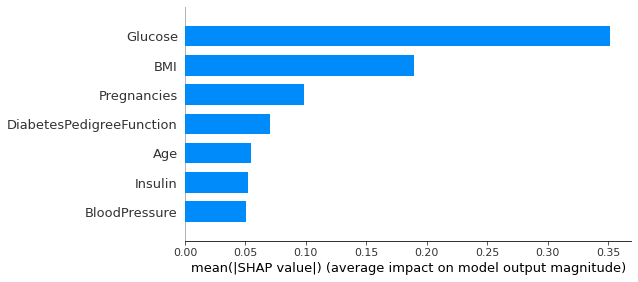

In [34]:
# Validating the impact of the features on the response variable
import shap
shap.initjs()
explainer = shap.LinearExplainer(svm, X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)
shap.summary_plot(shap_values, X_train, plot_type="bar")

### GridSearchCV to find the best hyperparameters for the models

### Logistic Regression

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    8.0s finished


Tuned hpyerparameters :(best parameters)  {'C': 0.23357214690901212, 'penalty': 'l2'}
Accuracy :  0.767119818739171
Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



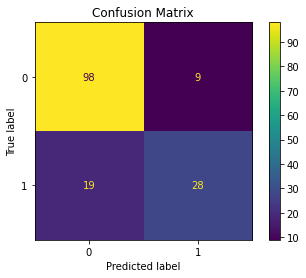

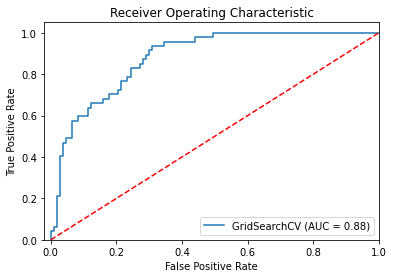

In [35]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (plot_confusion_matrix,plot_roc_curve)
parameters = {'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20)}
logreg_cv = GridSearchCV(LogisticRegression(random_state=0),parameters,cv = 5, verbose=True, n_jobs=-1)
logreg_cv_fit = logreg_cv.fit(X_train,y_train)
y_pred  = logreg_cv.predict(X_test)

print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy : ",logreg_cv.best_score_)
print("Classification Report : \n", classification_report(y_test, y_pred))

# Confusion Matrix
plot_confusion_matrix(logreg_cv_fit, X_test, y_test)
plt.title('Confusion Matrix')

# Receiver Operating Characteristic
plot_roc_curve(logreg_cv_fit, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Random Forest

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  5.2min finished


Tuned hpyerparameters :(best parameters)  {'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}
Accuracy :  0.7556591742388012
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       107
           1       0.68      0.68      0.68        47

    accuracy                           0.81       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154



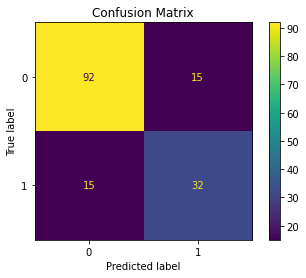

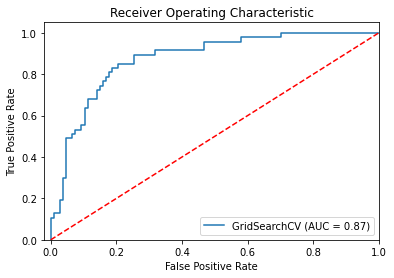

In [36]:
# Grid search cross validation for Random Forest
parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rfc_cv = GridSearchCV(RandomForestClassifier(), parameters, cv = 3, n_jobs = -1, verbose = 2)
rfc_cv_fit = rfc_cv.fit(X_train,y_train)
y_pred  = rfc_cv.predict(X_test)

print("Tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)
print("Accuracy : ",rfc_cv.best_score_)
print("Classification Report : \n", classification_report(y_test, y_pred))

# Confusion Matrix
plot_confusion_matrix(rfc_cv_fit, X_test, y_test)
plt.title('Confusion Matrix')

# Receiver Operating Characteristic
plot_roc_curve(rfc_cv_fit, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### SVM 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished


Tuned hpyerparameters :(best parameters)  {'C': 1, 'kernel': 'linear'}
Accuracy :  0.7524723443955752
Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



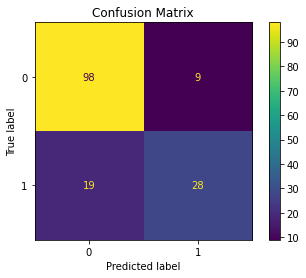

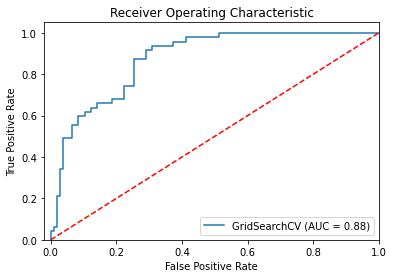

In [37]:
# Grid search cross validation for SVM
from sklearn.svm import SVC
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svm_cv = GridSearchCV(SVC(random_state=0,probability=True), parameters, cv = 5, verbose=True, n_jobs=-1)
svm_cv_fit = svm_cv.fit(X_train,y_train)
y_pred  = svm_cv.predict(X_test)

print("Tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("Accuracy : ",svm_cv.best_score_)
print("Classification Report : \n", classification_report(y_test, y_pred))

# Confusion Matrix
plot_confusion_matrix(svm_cv_fit, X_test, y_test)
plt.title('Confusion Matrix')

# Receiver Operating Characteristic
plot_roc_curve(svm_cv_fit, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Model Evaluation and Intepretation

**Classification Accuracy**

The accuracy rate helps measure the true positives and the true negatives of the total number of predictions made. Here the class to be predicted is imbalanced. An Outcome of 0 is almost 2 times the Outcome of 1 for the pateinets records. This would not be a good measure as the class of 0 hold the mahority of samples. Thus, using this as a evaluation measure of best model would be incorrect. 


**Confusion Matrix**

The confusion matrix helps us to identify the true positive, true negatives, false positives and false negatives. This matrix is a good measure to identify the number of the false negatives and false psoitives as we would not want to incoorectly classify a diabetic person as non-diabetic and vice-versa. 

**Precision vs Recall**
Our predication task is related to health of an individual and a correct classification would help the doctors start treatment as early as possible. An incorrect identification might lead to resulting in deterrioration of health of individual. Recall refers to the number of true positives divided by the number of all samples that should have been identified as positive. In order to minimize false negatives, we should aim for the Recall to be as close to 100%. 
Similarly, Precision refers to the number of true positives divided by the number of positive results predicted by the classification model. In order to minimise the false positives, we should aim for the Recall to be as close to 100%.

**ROC-AUC**
The ROC-AUC curve shows us the true positive rate vs. the false positive rate for all the threshold values. It is a measure of how good the model is in predicting all the classes. 

**Best Model**
Here, I have tuned three classification algorithims, Logistic Regression, Random Forest and Support Vector Machine (SVM). From the Classification Report, of Precision and Recall we can see that the average of the precision and the recall scores are almost similar for all the three models.(Precision .81 & Recall: .82). Going by the ROC-AUC score we can see that Logistic Regression and SVM have a higher score than as compared to Random Forest. We should go with the SVM model for predicting diabetes.